<a href="https://colab.research.google.com/github/trabajogrado28/Natali/blob/main/Codigo_def_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = '/content/drive/MyDrive/fetal2020.csv'
data = pd.read_csv(ruta)

<ipython-input-32-1f4f09874a70>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(ruta)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from itertools import product
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import umap
datos_fetal2020 = data
datos_fetal2020.head(6)

,Unnamed: 0,cod_dpto,cod_munic,a_defun,sit_defun,otrsitiode,tipo_defun,ano,mes,hora,...,c_muerteb,c_muertec,c_muerted,c_muertee,asis_med,causa_mult,c_bas1,causa_667,idprofcer,cau_homol
0,0,70,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
1,1,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
2,2,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
3,3,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
4,4,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
5,5,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80


In [ ]:
datos_importantes = datos_fetal2020[['cod_dpto', 'seg_social', 'niv_edum', 'edad_madre']]

In [ ]:
datos_rangos = datos_importantes[(datos_importantes["seg_social"] < 9) & (datos_importantes["niv_edum"] < 99) & (datos_importantes["edad_madre"] < 99)]
datos_rangos.head(4)

,cod_dpto,seg_social,niv_edum,edad_madre
0,70,2,4,3.0
1,11,1,4,5.0
2,11,5,9,5.0
3,11,5,5,3.0


In [ ]:
datos_importantes.seg_social.isnull()

,seg_social
0,False
1,False
2,False
3,False
4,False
...,...
33322,False
33323,False
33324,False
33325,False


In [ ]:
datos_importantes.edad_madre.isnull()

,edad_madre
0,False
1,False
2,False
3,False
4,False
...,...
33322,False
33323,False
33324,False
33325,False


In [ ]:
# Filtra para conservar solo las filas que cumplan con las condiciones (seg_social < 9, niv_edum < 99, edad_madre < 99)
datos_filtros = datos_importantes[(datos_importantes["seg_social"] < 9) &
                                  (datos_importantes["niv_edum"] < 99) &
                                  (datos_importantes["edad_madre"] < 99) ]

# Reemplaza el DataFrame original con los datos filtrados
datos_importantes = datos_filtros

In [ ]:
print(datos_filtros)

       cod_dpto  seg_social  niv_edum  edad_madre
0            70           2         4         3.0
1            11           1         4         5.0
2            11           5         9         5.0
3            11           5         5         3.0
4            11           5         4         2.0
...         ...         ...       ...         ...
33322        41           2         2         5.0
33323        11           2         2         2.0
33324        11           5         4         3.0
33325        76           1         3         5.0
33326        11           5         4         5.0

[30758 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a todas las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(datos_filtros)

In [ ]:
print(data_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
# Convertir a DataFrame con los nombres de las columnas
columnas_categoricas = encoder.get_feature_names_out(datos_filtros.columns)
datos_finales = pd.DataFrame(data_encoded, columns=columnas_categoricas)

# Mostrar las primeras filas para verificar
print(datos_finales.head())

   cod_dpto_5  cod_dpto_8  cod_dpto_11  cod_dpto_13  cod_dpto_15  cod_dpto_17  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          1.0          0.0          0.0          0.0   
2         0.0         0.0          1.0          0.0          0.0          0.0   
3         0.0         0.0          1.0          0.0          0.0          0.0   
4         0.0         0.0          1.0          0.0          0.0          0.0   

   cod_dpto_18  cod_dpto_19  cod_dpto_20  cod_dpto_23  ...  niv_edum_13  \
0          0.0          0.0          0.0          0.0  ...          0.0   
1          0.0          0.0          0.0          0.0  ...          0.0   
2          0.0          0.0          0.0          0.0  ...          0.0   
3          0.0          0.0          0.0          0.0  ...          0.0   
4          0.0          0.0          0.0          0.0  ...          0.0   

   edad_madre_1.0  edad_madre_2.0  edad_madre_3.0  edad_madre_

In [ ]:
# Normalizar los datos codificados entre 0 y 1 antes de RBM
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos_finales)

In [ ]:
# Configuración de la Máquina de Boltzmann Restringida (RBM)
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100, random_state=42)

# Entrenar la RBM
datos_rbm = rbm.fit_transform(datos_normalizados)

# Convertir a DataFrame para visualización
datos_rbm_df = pd.DataFrame(datos_rbm)

# Mostrar las primeras filas de las características aprendidas por la RBM
print("Representaciones aprendidas por la RBM:")
print(datos_rbm_df.head())

Representaciones aprendidas por la RBM:
          0         1         2         3         4         5         6  \
0  0.050589  0.993042  0.000273  0.000653  0.999910  0.999922  0.891045   
1  0.001550  0.999194  0.999298  0.999818  0.999920  0.000160  0.005129   
2  0.002357  0.986859  0.999952  0.999609  0.992370  0.999589  0.000004   
3  0.020769  0.843205  0.999975  0.000232  0.003450  0.999976  0.013183   
4  0.990529  0.412500  0.999156  0.996726  0.999936  0.997619  0.000014   

          7         8         9  
0  0.000382  0.997648  0.999880  
1  0.993660  0.979810  0.999423  
2  0.997922  0.947139  0.000017  
3  0.997822  0.993814  0.005542  
4  0.997856  0.243472  0.999995  


In [ ]:
# Calcular la reconstrucción manualmente
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Propagar hacia la capa oculta
activaciones_ocultas = sigmoide(np.dot(data_encoded, rbm.components_.T) + rbm.intercept_hidden_)

# Reconstruir la entrada desde la capa oculta
X_reconstruido = sigmoide(np.dot(activaciones_ocultas, rbm.components_) + rbm.intercept_visible_)

# Calcular el error de reconstrucción
error_reconstruccion = np.mean((data_encoded - X_reconstruido) ** 2)
print(f"Error de reconstrucción de la RBM: {error_reconstruccion}")

Error de reconstrucción de la RBM: 0.0156663118801355


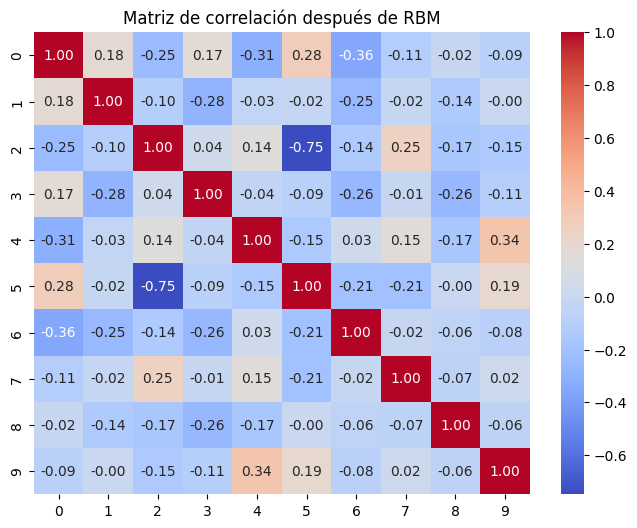

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación de las variables después de la RBM
correlation_matrix = pd.DataFrame(datos_rbm).corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación después de RBM")
plt.show()

In [ ]:
# Normalizar los datos transformados por la RBM antes de PCA
scaler = StandardScaler()
datos_rbm_normalizados = scaler.fit_transform(datos_rbm)

In [ ]:
# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2,whiten=True)  # Reducimos a 2 componentes principales para visualización
datos_pca = pca.fit_transform(datos_rbm_normalizados)


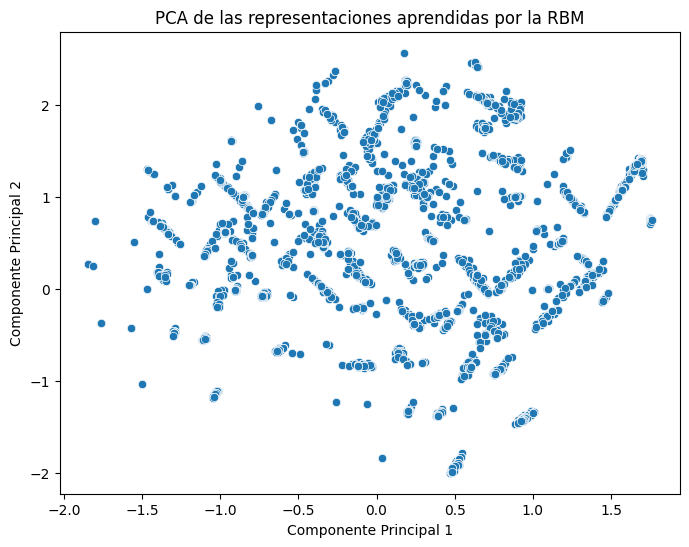

Varianza explicada por cada componente: [0.21995042 0.15947385]


In [ ]:
# Convertir a DataFrame
datos_pca_df = pd.DataFrame(datos_pca, columns=['PC1', 'PC2'])

# Visualización de los datos en 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=datos_pca_df['PC1'], y=datos_pca_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las representaciones aprendidas por la RBM')
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)



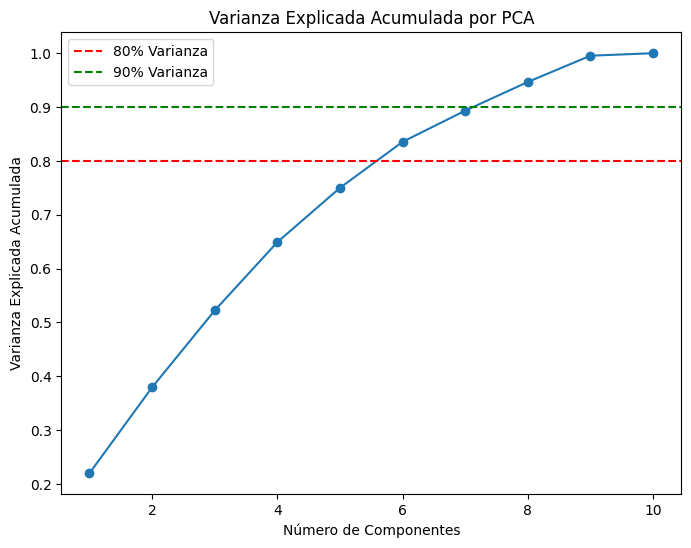

In [ ]:
# Análisis de varianza explicada acumulada
pca_full = PCA()
pca_full.fit(datos_rbm_normalizados)
varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8,6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Varianza')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Varianza')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.legend()
plt.show()

# **K-medias**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(datos_rbm)  # Usar la variable correcta que contiene las características transformadas por la RBM

# Asignar los clusters al DataFrame original
datos_importantes["Cluster"] = kmeans.labels_

# Ver las primeras filas con los clusters asignados
print(datos_importantes.head())

   cod_dpto  seg_social  niv_edum  edad_madre  Cluster
0        70           2         4         3.0        2
1        11           1         4         5.0        1
2        11           5         9         5.0        1
3        11           5         5         3.0        1
4        11           5         4         2.0        1


Estadísticas descriptivas por cluster:
          cod_dpto  seg_social  niv_edum  edad_madre
Cluster                                             
0        32.196009    1.000000  5.929461    4.535862
1        32.201874    3.296956  4.101483    3.463232
2        39.604131    2.000000  3.911161    4.086456
3        40.764450    2.332884  3.756514    3.749326


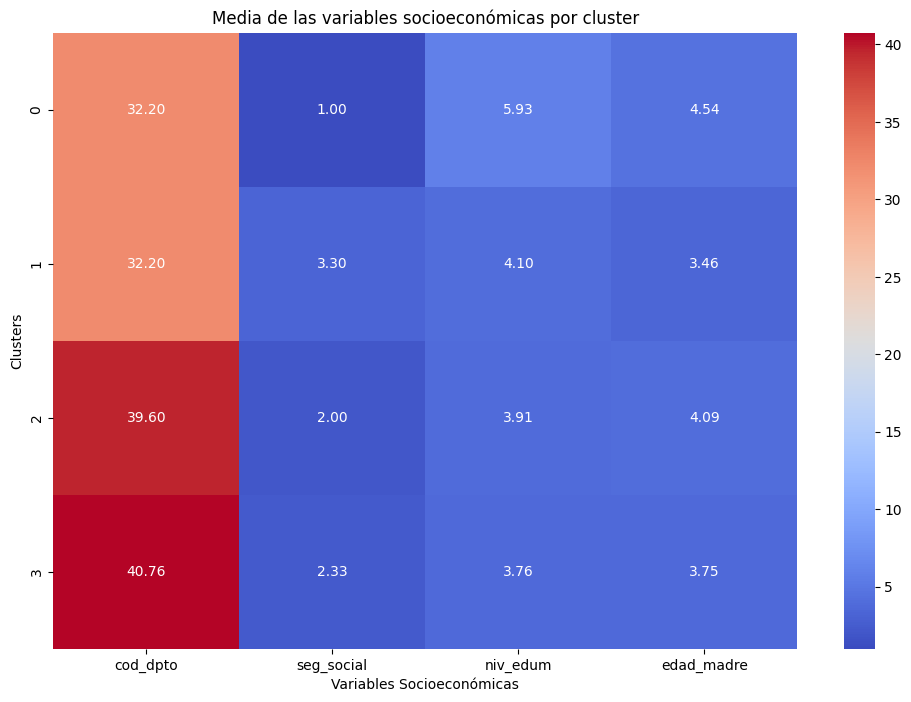

In [ ]:
# Agrupar por cluster y calcular estadísticas
estadisticas_cluster = datos_importantes.groupby("Cluster").mean()

print("Estadísticas descriptivas por cluster:")
print(estadisticas_cluster)

# Visualizar las estadísticas con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(estadisticas_cluster, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Media de las variables socioeconómicas por cluster")
plt.xlabel("Variables Socioeconómicas")
plt.ylabel("Clusters")
plt.show()

<ipython-input-26-5212721e9a8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_importantes, x="Cluster", y="edad_madre", palette="viridis")


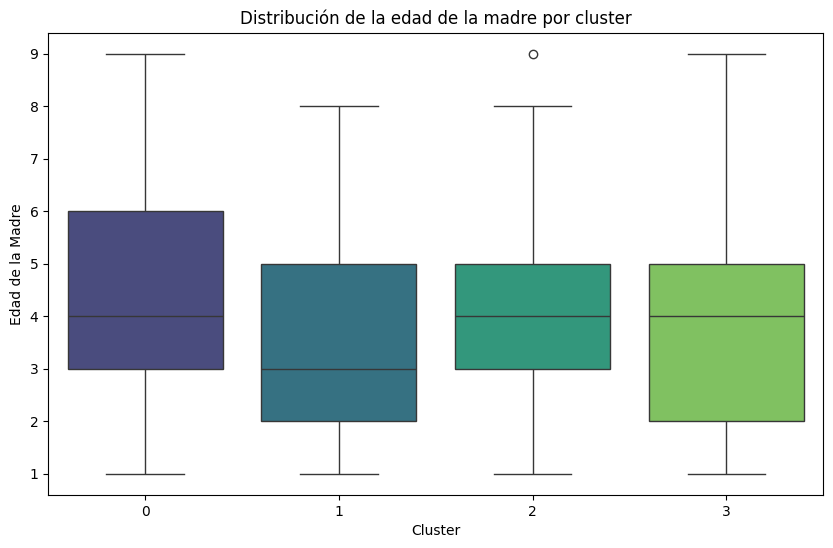

<ipython-input-26-5212721e9a8d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_importantes, x="Cluster", y="niv_edum", palette="viridis")


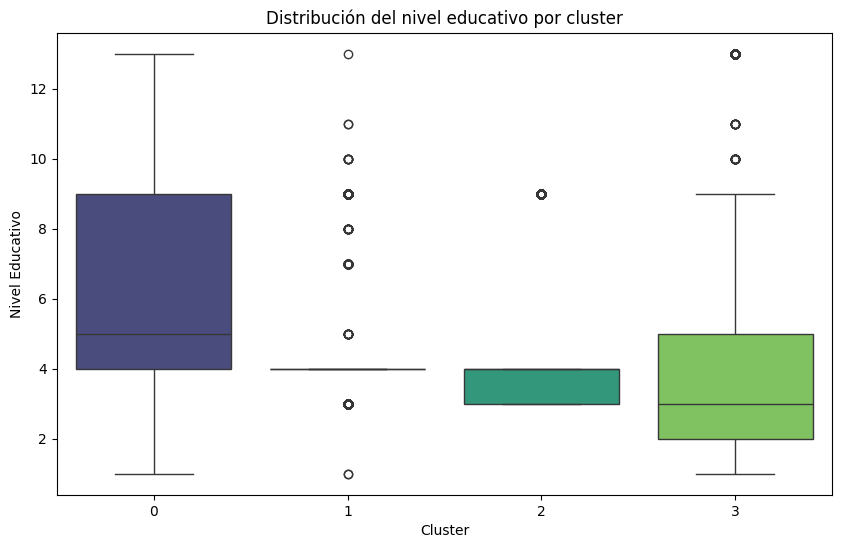

<ipython-input-26-5212721e9a8d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_importantes, x="Cluster", y="seg_social", palette="viridis")


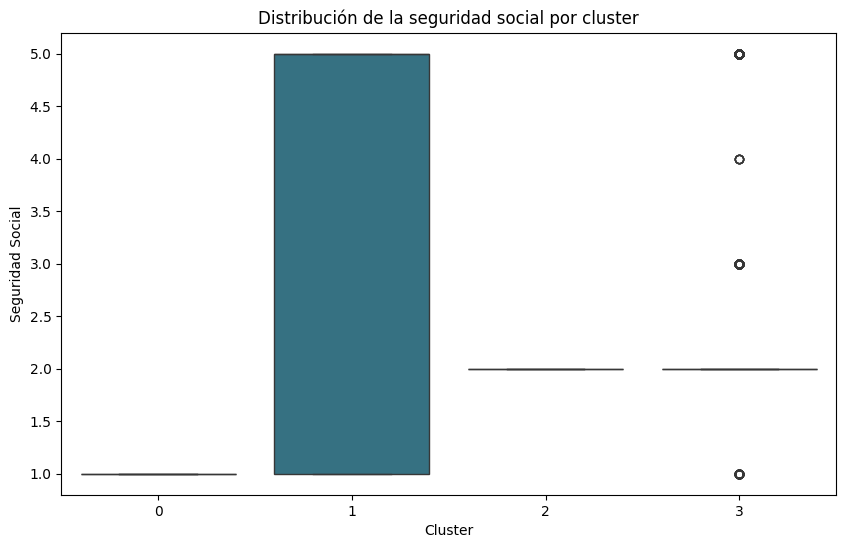

In [ ]:
# Visualizar la distribución de edad_madre por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_importantes, x="Cluster", y="edad_madre", palette="viridis")
plt.title("Distribución de la edad de la madre por cluster")
plt.xlabel("Cluster")
plt.ylabel("Edad de la Madre")
plt.show()

# Visualizar la distribución de nivel educativo por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_importantes, x="Cluster", y="niv_edum", palette="viridis")
plt.title("Distribución del nivel educativo por cluster")
plt.xlabel("Cluster")
plt.ylabel("Nivel Educativo")
plt.show()

# Visualizar la distribución de seguridad social por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_importantes, x="Cluster", y="seg_social", palette="viridis")
plt.title("Distribución de la seguridad social por cluster")
plt.xlabel("Cluster")
plt.ylabel("Seguridad Social")
plt.show()

In [ ]:
for cluster_id, stats in estadisticas_cluster.iterrows():
    print(f"Cluster {cluster_id}:")
    print(f"- Edad promedio de la madre: {stats['edad_madre']:.2f}")
    print(f"- Nivel educativo promedio: {stats['niv_edum']:.2f}")
    print(f"- Promedio de seguridad social: {stats['seg_social']:.2f}")
    print("-" * 50)


Cluster 0:
- Edad promedio de la madre: 4.54
- Nivel educativo promedio: 5.93
- Promedio de seguridad social: 1.00
--------------------------------------------------
Cluster 1:
- Edad promedio de la madre: 3.46
- Nivel educativo promedio: 4.10
- Promedio de seguridad social: 3.30
--------------------------------------------------
Cluster 2:
- Edad promedio de la madre: 4.09
- Nivel educativo promedio: 3.91
- Promedio de seguridad social: 2.00
--------------------------------------------------
Cluster 3:
- Edad promedio de la madre: 3.75
- Nivel educativo promedio: 3.76
- Promedio de seguridad social: 2.33
--------------------------------------------------


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Inertia
inertia = kmeans.inertia_

# Silhouette Score
silhouette = silhouette_score(datos_rbm, kmeans.labels_)

# Davies-Bouldin Index
db_index = davies_bouldin_score(datos_rbm, kmeans.labels_)

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(datos_rbm, kmeans.labels_)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")

Inertia: 36558.43252717132
Silhouette Score: 0.2141272310344404
Davies-Bouldin Index: 1.7562413636903824
Calinski-Harabasz Index: 6280.592734834963


**RANDOM FOREST**

In [ ]:
# Definir función para entrenar Random Forest con distintas variables objetivo
def entrenar_random_forest(variable_objetivo):
    print(f"\n🔹 Analizando {variable_objetivo} como variable objetivo 🔹\n")

    # Definir variables de entrada (X) y variable de salida (y)
    X = datos_rbm_df  # Datos transformados por RBM
    y = datos_filtros[variable_objetivo]  # Ahora usamos datos_filtros en lugar de df_filtrado

    # Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Definir y entrenar el modelo Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = rf.predict(X_test)

    # Evaluación del modelo
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    print("\nPrecisión del Modelo:")
    print(accuracy_score(y_test, y_pred))

    # Importancia de las variables
    importancia = pd.DataFrame({'Variable': X.columns, 'Importancia': rf.feature_importances_})
    importancia = importancia.sort_values(by='Importancia', ascending=False)

    print("\n🔍 Importancia de las Variables:")
    print(importancia)
    return rf # Return the trained model

# Variables a analizar como objetivo
variables_objetivo = ["seg_social", "niv_edum", "edad_madre", "cod_dpto"]

# Dictionary to store trained models
trained_models = {}

# Ejecutar el análisis para cada variable objetivo
for var in variables_objetivo:
    trained_models[var] = entrenar_random_forest(var)



🔹 Analizando seg_social como variable objetivo 🔹

Matriz de Confusión:
[[2400    0    0    0    0]
 [   0 2886    0    0    0]
 [   0    0   97    0    0]
 [   0    0    1    0    0]
 [   0    0    0    0  768]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2400
           2       1.00      1.00      1.00      2886
           3       0.99      1.00      0.99        97
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00       768

    accuracy                           1.00      6152
   macro avg       0.80      0.80      0.80      6152
weighted avg       1.00      1.00      1.00      6152


Precisión del Modelo:
0.9998374512353706

🔍 Importancia de las Variables:
   Variable  Importancia
2         2     0.402459
5         5     0.342168
6         6     0.069474
0         0     0.043202
1         1     0.042931
7         7     0.042703
3         3     0.019

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Matriz de Confusión:
[[   8    0    0    0    0    0    0    0    0    0    1    0    4]
 [   0  636    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1405    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2555    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  162    0    0    8    0    0    0    0    0]
 [   6    0    0    0    1    1    0    0    0    0    2    0    0]
 [   0    1    0    0    0    0  428    0    0    0    0    0    0]
 [   0    0    0    0    6    0    4  225    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  599    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   39    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   10    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    4    0    2    0    0    2    0    0   42]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1

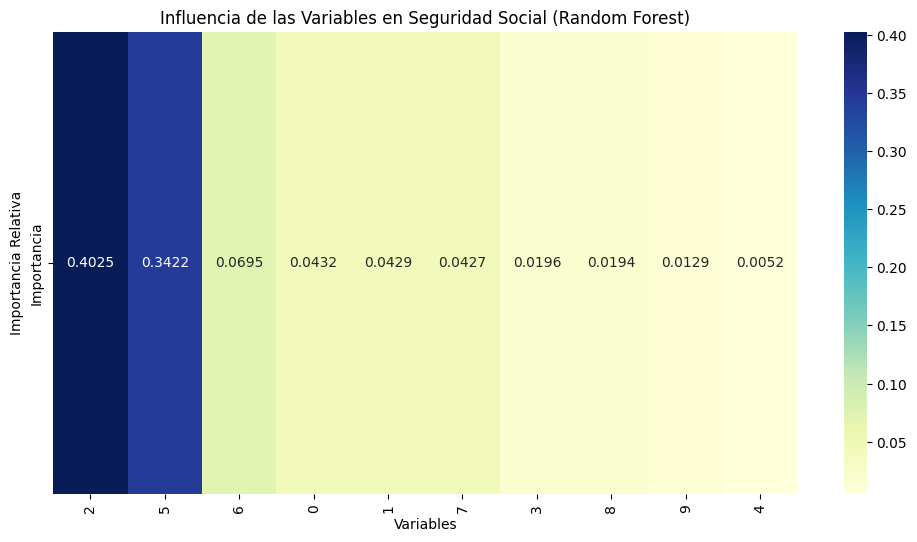

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Select the model for 'seg_social'
modelo_random_forest = trained_models['seg_social']

# Obtener la importancia de las características desde Random Forest
importances = modelo_random_forest.feature_importances_

# Crear un DataFrame con las importancias
df_importances = pd.DataFrame({
    'Variable': datos_rbm_df.columns,  # Nombres de las variables originales
    'Importancia': importances
})

# Ordenar por importancia
df_importances = df_importances.sort_values(by="Importancia", ascending=False)

# Crear un heatmap con la importancia de cada variable
plt.figure(figsize=(12, 6))
sns.heatmap(df_importances.set_index("Variable").T, cmap="YlGnBu", annot=True, fmt=".4f")

plt.title("Influencia de las Variables en Seguridad Social (Random Forest)")
plt.xlabel("Variables")
plt.ylabel("Importancia Relativa")
plt.xticks(rotation=90)
plt.show()
